In [6]:
import sys
sys.path.append("../")

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('text', usetex=True)

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import scipy

from rsep_explain.variables import auto_var
from utils import params_to_dataframe
from params import LinSepBBMExperiments3, LinSepBBMRobExperiments3
from IPython.display import display

fontsize = 20


def get_df(exp, result_file_dir='./results/calc_separation', columns=None):
    _, _, grid_params, _ = exp()()
    df = params_to_dataframe(grid_params,
                             columns=columns,
                             result_file_dir=result_file_dir,
                             logging_level=0)
    return df

In [8]:
df = get_df(LinSepBBMRobExperiments3, '../results/lin_sep_bbm_rob_3/', ['bbm_results'])

In [ ]:
def proc_bbm_result(df):
    depths, unique_clfs, accs, ers, rs = [], [], [], [], []
    for i, d in df.iterrows():
        depths.append(d['bbm_results']['depth'])
        unique_clfs.append(len(set(d['bbm_results']['learned_model'])))
        accs.append(d['bbm_results']['tst acc'])
        ers.append(d['bbm_results']['er dist'].mean())
        rs.append(str(d['rsep']))
        
    df['depth'] = depths
    df['unique weak leaners'] = unique_clfs
    df['tst acc'] = accs
    df['rob'] = ers
    df['rs'] = rs
    return df[['dataset', 'rs', 'rsep', 'random_seed', 'depth', 'unique weak leaners', 'tst acc', 'rob']]

ddf = proc_bbm_result(df)

In [ ]:
dset_rsep_to_acc_rob = {}
for (ds_name, rsep), d in ddf.groupby(["dataset", 'rs']).mean().iterrows():
    acc = d['tst acc']
    er = d['rob']
    ec = d['unique weak leaners']
    dset_rsep_to_acc_rob.setdefault(ds_name, {})[rsep] = (acc, er, ec)

In [ ]:
ddf.groupby(["dataset", 'rs']).mean()

adult
0.0 0.8122743346361437 6.0 0.50001361
0.05 0.8122743346361437 6.0 0.50001361
0.1 0.8122743346361437 6.0 0.50001361
0.15 0.8122743346361437 6.0 0.50001361
0.2 0.8122743346361437 6.0 0.50001361
0.25 0.8122743346361437 6.0 0.50001361


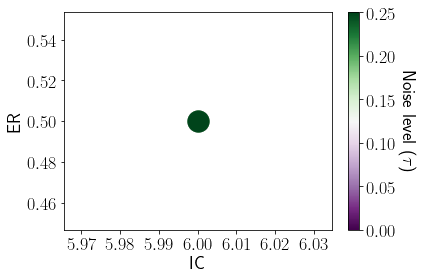

bank
0.0 0.8962995659530641 8.0 0.5000026100000001
0.05 0.8962995659530641 8.0 0.5000026100000001
0.1 0.8962995659530641 8.0 0.5000026100000001
0.15 0.8962995659530641 8.0 0.5000026100000001
0.2 0.8962995659530641 8.0 0.5000026100000001
0.25 0.8962995659530641 8.0 0.5000026100000001


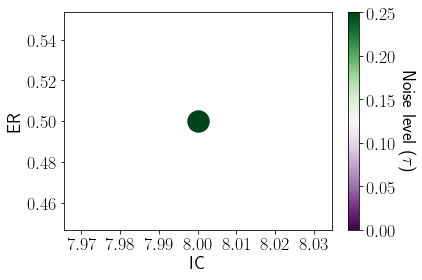

bank2
0.0 0.9064150665783858 14.8 0.11837119535810899
0.05 0.8968218936217169 4.5 0.4980011308776874
0.1 0.8965938350621643 4.7 0.498884251898075
0.15 0.8964393437798867 1.0 0.5000019100000002
0.2 0.8964393437798867 1.0 0.5000019100000002
0.25 0.8964393437798867 1.0 0.5000019100000002


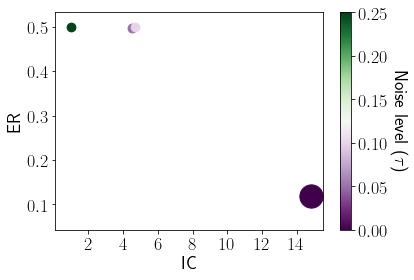

breastcancer
0.0 0.9575221238938052 11.0 0.2747028766666667
0.05 0.9575221238938052 11.0 0.2747028766666667
0.1 0.963716814159292 14.8 0.2568036766666666
0.15 0.9504424778761063 11.9 0.2872205433333333
0.2 0.9411504424778758 9.6 0.34779126555555556
0.25 0.9048672566371682 4.2 0.41131038777777773


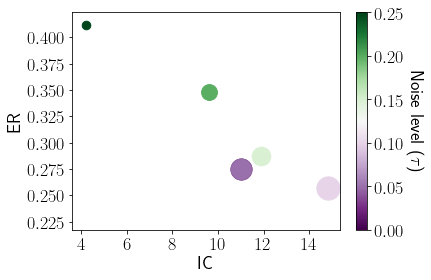

careval
0.0 0.7697022767075307 8.7 0.49451270999999997
0.05 0.7697022767075307 8.7 0.4950627099999999
0.1 0.7697022767075307 8.7 0.49561270999999996
0.15 0.7697022767075307 8.7 0.49616271
0.2 0.7697022767075307 8.7 0.4967127099999999
0.25 0.7697022767075307 8.7 0.49726270999999994


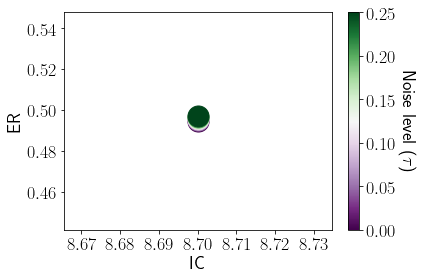

compasbin
0.0 0.6624561403508772 7.6 0.31304261
0.05 0.6624561403508772 7.6 0.33174261000000005
0.1 0.6624561403508772 7.6 0.3504426100000001
0.15 0.6624561403508772 7.6 0.36914261000000004
0.2 0.6624561403508772 7.6 0.38784261
0.25 0.6624561403508772 7.6 0.40654260999999997


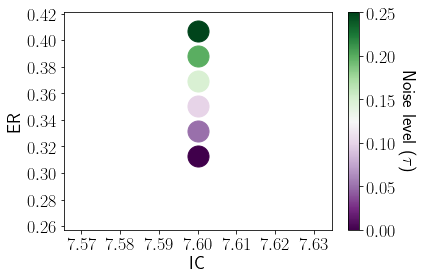

diabetes
0.0 0.6496062992125984 3.4 0.07911204817804487
0.05 0.6499999999999999 2.1 0.14528268607692862
0.1 0.6499999999999999 1.1 0.16738605008941881
0.15 0.6507874015748031 1.0 0.1758540083606558
0.2 0.6543307086614172 1.0 0.20010000999999988
0.25 0.6543307086614172 1.0 0.2501000099999998


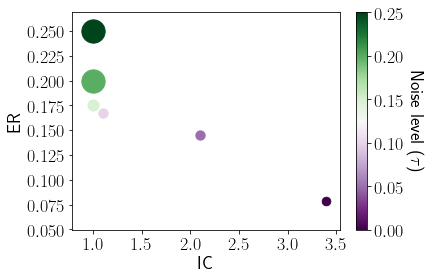

ficobin
0.0 0.7211181923522596 11.8 0.50004361
0.05 0.7211181923522596 11.8 0.50004361
0.1 0.7211181923522596 11.8 0.50004361
0.15 0.7211181923522596 11.8 0.50004361
0.2 0.7211181923522596 11.8 0.50004361
0.25 0.7211181923522596 11.8 0.50004361


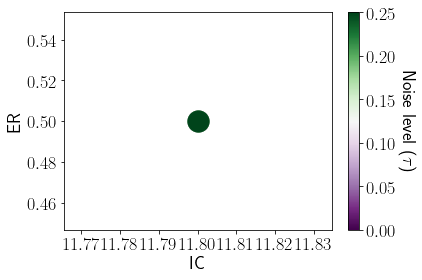

heart
0.0 0.8266666666666665 11.0 0.2695860435565326
0.05 0.8222222222222222 9.5 0.32343075772650187
0.1 0.8122222222222222 8.5 0.37529022261762196
0.15 0.8233333333333333 8.4 0.3793258092708768
0.2 0.7866666666666666 6.3 0.4395820668135171
0.25 0.7766666666666666 6.2 0.4710047545957238


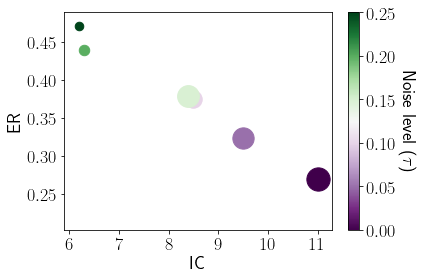

ionosphere
0.0 0.8474137931034484 10.3 0.23837468895453146
0.05 0.8568965517241379 6.8 0.2751116101737652
0.1 0.8586206896551722 3.7 0.28147716264774586
0.15 0.778448275862069 3.4 0.4158126201955984
0.2 0.7491379310344828 1.0 0.5000872654145667
0.25 0.7491379310344828 1.0 0.5000872654145667


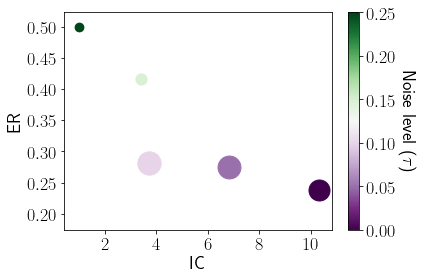

mammo
0.0 0.7713836477987422 1.9 0.4950417099999999
0.05 0.7713836477987422 1.9 0.4950417099999999
0.1 0.7713836477987422 1.9 0.4950417099999999
0.15 0.7713836477987422 1.9 0.4950417099999999
0.2 0.7723270440251573 1.8 0.49944230999999994
0.25 0.7723270440251573 1.8 0.49954231


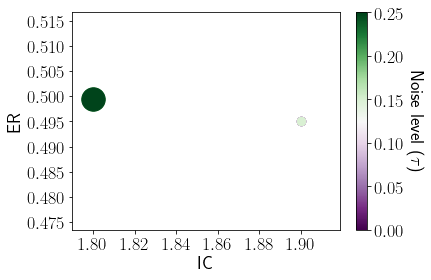

mushroom
0.0 0.9668034315553898 9.9 0.50004731
0.05 0.9668034315553898 9.9 0.50004731
0.1 0.9668034315553898 9.9 0.50004731
0.15 0.9668034315553898 9.9 0.50004731
0.2 0.9668034315553898 9.9 0.50004731
0.25 0.9668034315553898 9.9 0.50004731


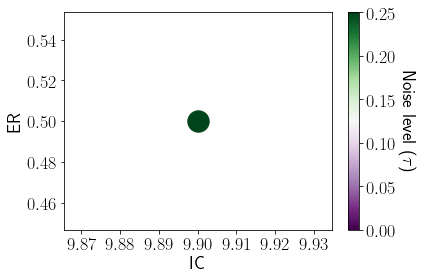

spambase
0.0 0.8966425279789336 22.5 0.005713520144607901
0.05 0.7885450954575379 5.6 0.04770999129397081
0.1 0.6766951942067149 4.1 0.11471737580319175
0.15 0.6355497037524687 3.1 0.18566233301916035
0.2 0.6208689927583937 3.1 0.2349927330742317
0.25 0.6158657011191573 2.3 0.33362781782433615


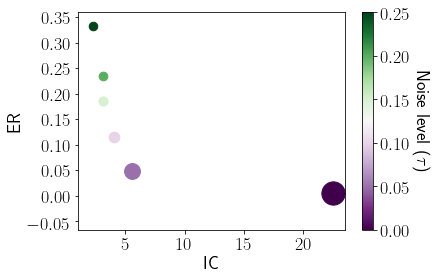

In [15]:
fontsize = 18
cm = plt.cm.get_cmap('PRGn')

for ds_name, data in dset_rsep_to_acc_rob.items():
    ds_name = ds_name[5:]
    if ds_name == "bank_2":
        ds_name = "bank2"
    print(ds_name)
    #plt.title(ds_name, fontsize=fontsize)
    all_ec, allaccs = [], []
    for _, (acc, _, ec) in data.items():
        all_ec.append(ec)
        allaccs.append(acc)
    all_ec = -np.asarray(all_ec)
    allaccs = np.asarray(allaccs)

    for r, (acc, er, ec) in data.items():
        
        #print(ec)
        #ec = -ec
        #if all_ec.max() != all_ec.min():
        #    ec = np.exp(3 * (0.1 + (ec - all_ec.min()) / (all_ec.max() - all_ec.min())))
        #else:
        #    ec = np.exp(2)
        
        print(r, acc, ec, er)
        
        if allaccs.max() != allaccs.min():
            acc = np.exp(2 * (0.1 + (acc - allaccs.min()) / (allaccs.max() - allaccs.min())))
        else:
            acc = np.exp(2)
        
        plt.scatter([ec], [er],
                    s=[acc * 60], c=[float(r)],
                    label=r, vmin=0, vmax=0.25, cmap=cm)
        #plt.scatter([acc], [er],
        #            s=[ec*40], c=[float(r)],
        #            label=r, vmin=0, vmax=0.25, cmap=cm)
        #plt.scatter([acc], [er],
        #            c=[ec], s=[(float(r)+0.05) * 2000],
        #            label=r, vmin=all_ec.min(), vmax=all_ec.max(), cmap=cm)
        #plt.scatter(acc, er, s=ec, s=(float(r)+0.05)*2000, label=r, cmap=cm)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=fontsize)
    cbar.ax.get_yaxis().labelpad = 20
    cbar.ax.set_ylabel('Noise level ($\\tau$)', rotation=270, fontsize=fontsize)
    
    plt.ylabel("ER", fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.xlabel("Accuracy", fontsize=fontsize)
    plt.xlabel("IC", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    #plt.legend(fontsize=fontsize)
    plt.savefig(f"./figs/trade_offs/{ds_name}.png", bbox_inches="tight")
    plt.show()

In [15]:
dset_rsep_to_acc_rob.keys()

dict_keys(['risk_ionosphere', 'risk_diabetes', 'risk_breastcancer', 'risk_adult', 'risk_mushroom', 'risk_mammo', 'risk_spambase', 'risk_bank', 'risk_careval', 'risk_compasbin', 'risk_ficobin', 'risk_bank_2', 'risk_heart'])